In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Rupok_ADP/Enzyme A+Z_700.xlsx')
df.head()

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,...,PAAC33,PAAC34,PAAC35,PAAC36,PAAC37,PAAC38,PAAC39,PAAC40,PAAC41,Target
0,1,1,1,1,0,0,1,1,1,1,...,2.500,2.438,2.371,2.606,2.652,2.341,2.500,2.515,2.420,1
1,1,1,1,0,0,0,1,1,1,0,...,2.500,2.438,2.371,2.606,2.652,2.341,2.500,2.515,2.420,1
2,1,1,1,0,0,0,1,1,1,1,...,2.500,2.438,2.371,2.606,2.652,2.341,2.500,2.515,2.420,1
3,1,1,0,0,0,0,1,1,1,1,...,2.500,2.438,2.371,2.606,2.652,2.341,2.500,2.515,2.420,1
4,1,1,0,0,0,0,1,1,1,0,...,2.543,2.499,2.391,2.679,2.638,2.324,2.507,2.510,2.415,1


# SVM

In [3]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use SVM instead of MLPClassifier
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability=True, random_state=20)  # probability=True is required for predict_proba
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_test, p))

from sklearn.metrics import roc_curve, auc
fpr_5, tpr_5, thresholds = roc_curve(y_test, p)
auc_score5 = auc(fpr_5, tpr_5)
auc_score5

[[1229  155]
 [ 258  458]]
80.33333333333333
AUC = 0.8672901798688928


np.float64(0.8672901798688928)

# XGBoost

In [38]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Rupok_ADP/Enzyme A+Z_1000.xlsx')
df.head()

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,...,PAAC33,PAAC34,PAAC35,PAAC36,PAAC37,PAAC38,PAAC39,PAAC40,PAAC41,Target
0,1,1,0,0,0,0,1,1,1,0,...,2.567,2.452,2.601,2.442,2.281,2.534,2.356,2.539,2.451,1
1,1,1,0,0,0,0,1,1,0,0,...,2.666,2.473,2.523,2.493,2.487,2.440,2.479,2.467,2.373,1
2,1,1,1,0,0,0,1,1,1,0,...,2.666,2.473,2.523,2.493,2.487,2.440,2.479,2.467,2.373,1
3,1,1,1,0,0,0,1,1,1,1,...,2.436,2.488,2.427,2.392,2.464,2.489,2.337,2.556,2.543,1
4,1,1,0,0,0,0,1,1,1,0,...,2.495,2.401,2.427,2.341,2.530,2.502,2.477,2.495,2.661,1


In [53]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.45, random_state=28
)

# Feature scaling (important for KNN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use KNN instead of XGBoost
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_test, p))

from sklearn.metrics import roc_curve, auc
fpr_4, tpr_4, thresholds = roc_curve(y_test, p)
auc_score4 = auc(fpr_4, tpr_4)
auc_score4


[[1809  287]
 [ 303  751]]
81.26984126984127
AUC = 0.8277832448542086


np.float64(0.8277832448542086)

# AdaBoost

In [15]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Rupok_ADP/Enzyme A+Z_1000.xlsx')
df.head()

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,...,PAAC33,PAAC34,PAAC35,PAAC36,PAAC37,PAAC38,PAAC39,PAAC40,PAAC41,Target
0,1,1,0,0,0,0,1,1,1,0,...,2.567,2.452,2.601,2.442,2.281,2.534,2.356,2.539,2.451,1
1,1,1,0,0,0,0,1,1,0,0,...,2.666,2.473,2.523,2.493,2.487,2.440,2.479,2.467,2.373,1
2,1,1,1,0,0,0,1,1,1,0,...,2.666,2.473,2.523,2.493,2.487,2.440,2.479,2.467,2.373,1
3,1,1,1,0,0,0,1,1,1,1,...,2.436,2.488,2.427,2.392,2.464,2.489,2.337,2.556,2.543,1
4,1,1,0,0,0,0,1,1,1,0,...,2.495,2.401,2.427,2.341,2.530,2.502,2.477,2.495,2.661,1


In [74]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use XGBoost instead of SVM
#from xgboost import XGBClassifier
#model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train, y_train)

# Use Decision Tree (DT) instead of XGBoost
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)


# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_test, p))

from sklearn.metrics import roc_curve, auc
fpr_3, tpr_3, thresholds = roc_curve(y_test, p)
auc_score3 = auc(fpr_3, tpr_3)
auc_score3

[[615  93]
 [ 65 277]]
84.95238095238096
AUC = 0.8392927941322232


np.float64(0.8392927941322232)

# Bagging

In [78]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=20)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use AdaBoost instead of XGBoost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=200, random_state=20)
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_test, p))

from sklearn.metrics import roc_curve, auc
fpr_2, tpr_2, thresholds = roc_curve(y_test, p)
auc_score2 = auc(fpr_2, tpr_2)
auc_score2

[[354  22]
 [ 80 104]]
81.78571428571428
AUC = 0.8547785615171137


np.float64(0.8547785615171137)

# MLP

In [79]:
# Split data into independent (X) and dependent (Y) columns
y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use MLP Classifier instead of RandomForest
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', random_state=20)
model.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

cmann = confusion_matrix(y_test, y_pred)
print(cmann)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

# Probabilities and AUC
p = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_test, p))

from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, p)
auc_score1 = auc(fpr_1, tpr_1)
auc_score1

[[1081  100]
 [  84  485]]
89.4857142857143
AUC = 0.9335405787892361


np.float64(0.9335405787892361)

In [81]:
auc_score5 = 0.8037
auc_score4 = 0.7814
auc_score3 = 0.8256
auc_score2 = 0.8433
auc_score1 = 0.8671

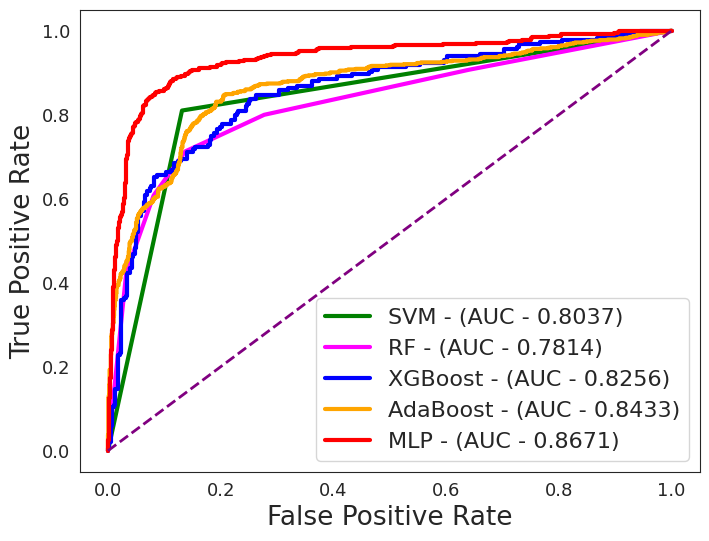

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(fpr_3,tpr_3, color = "green", label = "SVM - (AUC - %0.4f)" %auc_score5, lw = 3)
plt.plot(fpr_4,tpr_4, color = "magenta", label = "RF - (AUC - %0.4f)" %auc_score4, lw = 3)
plt.plot(fpr_2,tpr_2, color = "blue", label = "XGBoost - (AUC - %0.4f)" %auc_score3, lw = 3)
plt.plot(fpr_5,tpr_5, color = "orange", label = "AdaBoost - (AUC - %0.4f)" %auc_score2, lw = 3)
plt.plot(fpr_1,tpr_1, color = "red", label = "MLP - (AUC - %0.4f)" %auc_score1, lw = 3)


#plt.plot(fpr_1,tpr_1, color = "red", label = "SVM - %0.3f " %auc_score1, lw = 4)

#plt.plot(fpr_1,tpr_1, color = "indigo", label = "6 kmer - %0.3f " %auc_score1, lw = 4)
#plt.plot(fpr_7,tpr_7, color = "cyan", label = "Glove + FastText +Word2vec - %0.2f " %auc_score7, lw = 4)

plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize = 19)
plt.ylabel('True Positive Rate', fontsize=19)
#plt.title('One hot Encoding', fontsize=22)
plt.legend(loc = "lower right", fontsize=16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('/content/drive/MyDrive/Rupok_ADP/Bashar_MLP_model3.png',dpi=800)
plt.savefig('/content/drive/MyDrive/Rupok_ADP/Bashar_MLP_model3.pdf',dpi=800)
plt.show()